#**Treinamento de SVM**

**Aluno:** Pedro Victor Andrade Alves

**Matrícula:** 20190001079

* **Classificação**
* **Identificar se um determinado paciente, com doença cardiovascular, morreu ou não** 

Fonte: [https://www.kaggle.com/andrewmvd/heart-failure-clinical-data](https://www.kaggle.com/andrewmvd/heart-failure-clinical-data)

## Carregando os Dados 

In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (2).json


{'kaggle.json': b'{"username":"pedrovictor046","key":"a9cca907be28bc112616cc9a848a4ba6"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d andrewmvd/heart-failure-clinical-data

  0% 0.00/3.97k [00:00<?, ?B/s]
100% 3.97k/3.97k [00:00<00:00, 4.40MB/s]


In [ ]:
from zipfile import ZipFile
file_name = "heart-failure-clinical-data.zip"

with ZipFile(file_name, 'r') as zip:
    zip.extractall()
    print('Done')

Done


In [ ]:
import pandas as pd

dataset = pd.read_csv("heart_failure_clinical_records_dataset.csv")
dataset.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
dataset.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


## Atributos escolhidos
* Colunas 0 e 5 (indíces) 
* Idade e pressão alta 

In [ ]:
X = dataset.loc[:,['age', 'high_blood_pressure']].values
y = dataset['DEATH_EVENT'].values

print(X[0:6,:])
print(y[:6])

[[75.  1.]
 [55.  0.]
 [65.  0.]
 [50.  0.]
 [65.  0.]
 [90.  1.]]
[1 1 1 1 1 1]


## Divisão dos conjuntos de dados
* Em dois conjuntos: treinamento e teste

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

## Normalização 

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)

X_test = sc.transform(X_test)

## Treinamento 
* Com a SVM com kernel linear

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear')
classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

## Avaliação do Modelo 
* Uso da métrica de acurácia 
* Matriz de Confusão 

In [ ]:
y_pred = classifier.predict(X_test)

print(y_test[0:35])
print(y_pred[0:35])

[0 0 1 0 0 0 0 0 1 0 0 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 1 0 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
from sklearn.metrics import accuracy_score

print("Acurácia: ", accuracy_score(y_test,y_pred)*100, "%"  )


Acurácia:  64.0 %


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("Matrix de confusão: ")
print(cm)

Matrix de confusão: 
[[48  0]
 [27  0]]


## Visualização dos resultados

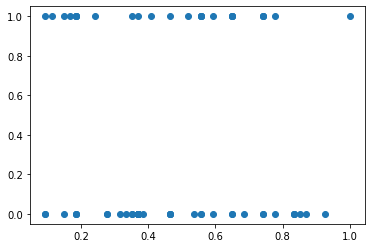

In [ ]:
import matplotlib.pyplot as plt

# Seleção dos elementos classificados como positivo (morreu)
age_pos = X_train[y_train == 1, 0]
high_blood_pressure_pos = X_train[y_train == 1, 1]

plt.scatter(age_pos,high_blood_pressure_pos)

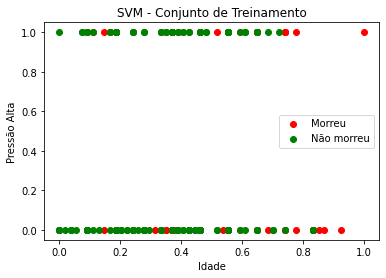

In [ ]:
# Seleção dos elementos classificados como negativos (não morreu)
age_neg = X_train[y_train == 0, 0]
high_blood_pressure_neg = X_train[y_train == 0, 1]

plt.scatter(age_pos,high_blood_pressure_pos, color='red', label = 'Morreu')
plt.scatter(age_neg,high_blood_pressure_neg, color='green', label = 'Não morreu')

plt.title('SVM - Conjunto de Treinamento')
plt.xlabel('Idade')
plt.ylabel('Pressão Alta')
plt.legend()
plt.show()

In [ ]:
import numpy as np

# variação no eixo x para o plot 
vx = np.arange(start = -0.1, stop = 1.1, step = 0.1) 
vy = np.arange(start = -0.1, stop = 1.1, step = 0.1)

X1, X2 = np.meshgrid(vx,vy) 

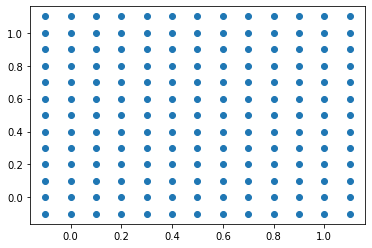

In [ ]:
plt.scatter(X1.ravel(), X2.ravel()) 

In [ ]:
vx = np.arange(-0.1, 1.1, 0.025) 
vy = np.arange(-0.1, 1.1, 0.025)
X1, X2 = np.meshgrid(vx,vy) 

In [ ]:
y_pred_mesh =  classifier.predict(np.array([X1.ravel(),X2.ravel()]).T ).reshape(X1.shape)

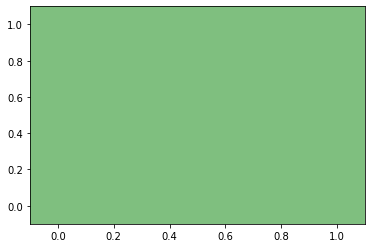

In [ ]:
from matplotlib.colors import ListedColormap
plt.contourf(X1,X2, y_pred_mesh, alpha  = 0.5, cmap = ListedColormap(('green','red')))


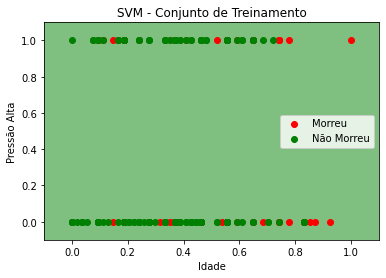

In [ ]:
plt.contourf(X1,X2, y_pred_mesh, alpha  = 0.5, cmap = ListedColormap(('green','red')))

plt.scatter(age_pos,high_blood_pressure_pos, color='red', label = 'Morreu')
plt.scatter(age_neg,high_blood_pressure_neg, color='green', label = 'Não Morreu')

plt.title('SVM - Conjunto de Treinamento')
plt.xlabel('Idade')
plt.ylabel('Pressão Alta')
plt.legend()
plt.show()